# Assignment 19 - Feb 20' 23 - Flask 2

 ### 1. Explain GET and POST methods

| Method | Description |
|-|-|
|GET|This is used to send the data in an without encryption of the form to the server.|
|POST|Sends the form data to server. Data received by POST method is not cached by server.|

#### GET
* Get method is mainly used at the client (Browser) side to send a request to a specified server to get certain data or resources. Using this method the server should only let us receive the data and not change its state. Hence it is only used to view something and not to change it.
* The request parameter of the get method is appended to the URL. Get request is better for the data which does not need to be secure (It means the data which does not contain images or word documents).
* This method is used to retrieve data from the server. e.g In an eCommerce application, there is a search button to search for an item. after entering a keyword if we noticed, the keyword you searched for gets displayed in the URL. 
* **NOTE - This request is used when the data is not sensitive**.
* Real world example - Goole Search, etc.

#### POST
* Post method is mainly used at the client (Browser) side to send data to a Specified server in order to create or rewrite a particular resource/data. This data sent to the server is stored in the request body of the HTTP request. 
* Post method eventually leads to the creation of a new resource or updating an existing one. Due to this dynamic use, it is one of the most used HTTP methods. 
* It is not one of the most secure methods because the data that is been sent is included in the body of the request and not in the URL. Post request is better for the data which needs to be secure (It means the data which contains images or word documents).
* This method makes enables users to send data over to the server. e.g In any authentication-enabled application, the registration and login form is the best example for the post method. Whenever we enter Information and submit the data get transferred over to the POST request. And if we noticed, unlike get request there is no information will be ever displayed in the URL.
* Real world example - Login page, etc.

### 2. Why is request used in Flask?

* In a Flask App, we have our own Webpage (Client) and a Server. The Server should process the data.  
* The Request, in Flask, is an object that contains all the data sent from the Client to Server. This data can be recovered using the GET/POST Methods. 
* POST is used when your application expects user input to be received by command or an HTTP request, while GET gets all the information before it even has a chance for submission.
* There are various attributes associated with the request objects. They are Form, Cookies, Args, Files, and Method.
</br>

| Attribute | Description |
|-|-|
|Form|It is the dictionary object containing cookie names and the values. It is saved at the client-side to track the user session.|
|Cookies|It is the dictionary object containing cookie names and the values. It is saved at the client-side to track the user session.|
|Args|It is parsed from the URL. It is the part of the URL which is specified in the URL after question mark (?).|
|Files|It contains the data related to the uploaded file.|
|Method|It is the current request method (GET or POST).|

### 3. Why is redirect() used in Flask?

#### WHY?
* *redirect()* is used in the Flask class to send the user to a particular URL with the status code. 
* conversely, this status code additionally identifies the issue. When we access a website, our browser sends a request to the server, and the server replies with what is known as the HTTP status code, which is a three-digit number.
* Syntax -
> flask.redirect(location, code=302)
* Parameters - 
> * location(str): the location which URL directs to.
> * code(int): The status code for Redirect.
> * Code: The default code is 302 which means that the move is only temporary.
* Return -
> The response object and redirects the user to another target location with the specified code.

#### The different  types of HTTP codes are:
| Code | Status |
|-|-|
|300|Multiple_choices|
|301|Moved_permanently|
|302|Found|
|303|See_other|
|304|Not_modified|
|305|Use_proxy|
|306|Reserved|
|307|Temporary_redirect|

### 4. What are templates in Flask? Why is the render_template() function used?

#### WHAT?
* Templates are basically external HTML files which can be rendered using render_template()
* Flask facilitates us to render the external HTML file instead of hardcoding the HTML in the view function. Here, we can take advantage of the jinja2 template engine on which the flask is based.
* The term 'web templating system' refers to designing an HTML script in which the variable data can be inserted dynamically. A web template system comprises of a template engine, some kind of data source and a template processor.
* Flask uses jinja2 template engine. A web template contains HTML syntax interspersed placeholders for variables and expressions (in these case Python expressions) which are replaced values when the template is rendered.

#### Why render_template()?
* Flask provides us the render_template() function which is used to render the external HTML file to be returned as the response from the view function.

### 5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook

In [ ]:
# Calculator App

from flask import Flask, request, render_template, jsonify

app = Flask(__name__)

# Code to create an API for simple calculator app 

@app.route('/')
def home_page():
    return render_template('index.html')

@app.route('/math', methods = ['POST'])
def math_ops():
    if(request.method == 'POST'):
        ops = request.form['operation']
        num1 = int(request.form['num1'])
        num2 = int(request.form['num2'])
        if ops == 'add':
            r = num1 + num2
            cal_result = "The sum of " + str(num1) + " and " + str(num2) + " is " + str(r)
        if ops == 'subtract':
            r = num1 - num2
            cal_result = "The subtraction of " + str(num1) + " and " + str(num2) + " is " + str(r)
        if ops == 'multiply':
            r = num1 * num2
            cal_result = "The multiplication of " + str(num1) + " and " + str(num2) + " is " + str(r)
        if ops == 'divide':
            r = num1 / num2
            cal_result = "The division of " + str(num1) + " and " + str(num2) + " is " + str(r)
        return render_template('results.html', result = cal_result)


# following code is used to test the API in POSTMAN tool
@app.route('/postman_action', methods = ['POST'])
def math_ops1():
    if(request.method == 'POST'):
        ops = request.json['operation']
        num1 = int(request.json['num1'])
        num2 = int(request.json['num2'])
        if ops == 'add':
            r = num1 + num2
            cal_result = "The sum of " + str(num1) + " and " + str(num2) + " is " + str(r)
        if ops == 'subtract':
            r = num1 - num2
            cal_result = "The subtraction of " + str(num1) + " and " + str(num2) + " is " + str(r)
        if ops == 'multiply':
            r = num1 * num2
            cal_result = "The multiplication of " + str(num1) + " and " + str(num2) + " is " + str(r)
        if ops == 'divide':
            r = num1 / num2
            cal_result = "The division of " + str(num1) + " and " + str(num2) + " is " + str(r)
        
        return jsonify(cal_result)


if __name__=="__main__":
    app.run(host="0.0.0.0")

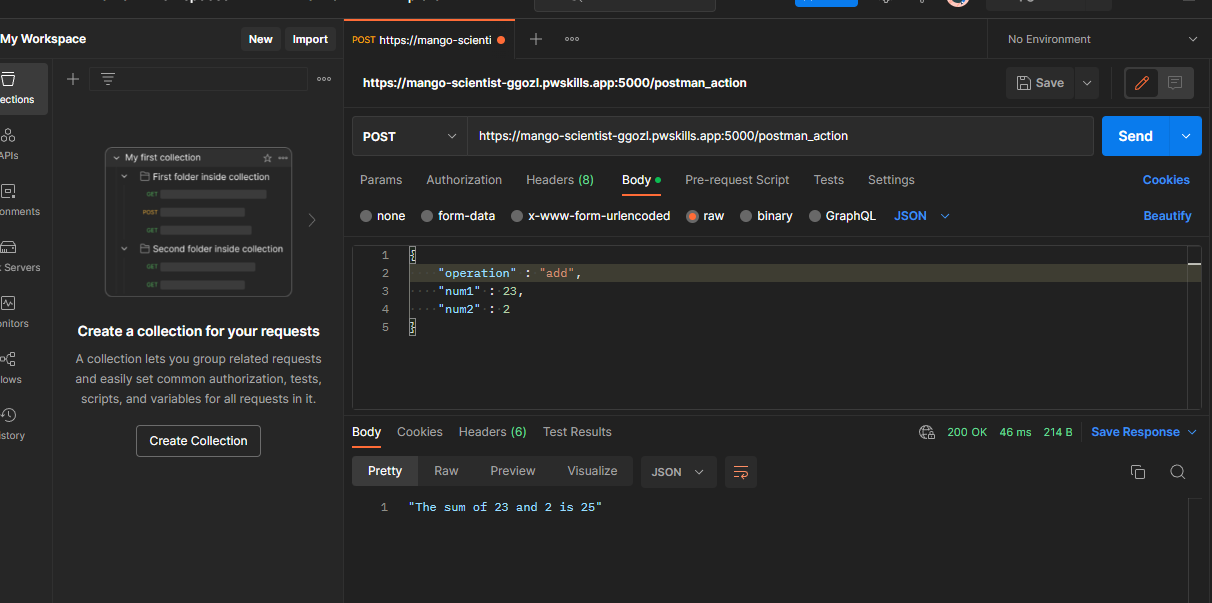